In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

# mount 
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Using TensorFlow backend.


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd gdrive/My Drive/Colab Notebooks/models

/content/gdrive/My Drive/Colab Notebooks/models


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print(train_data.shape)

(60000, 28, 28)


In [6]:
print(test_data.shape)

(10000, 28, 28)


In [7]:
print(len(train_labels))

60000


In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

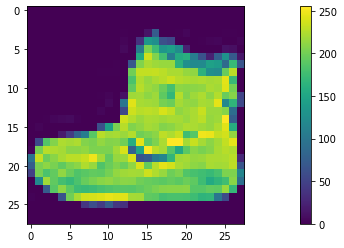

In [9]:
# quick visualization
plt.figure(figsize=(20,4))
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# vectorization train data and test data
train_images = train_data / 255.0
test_images = test_data / 255.0

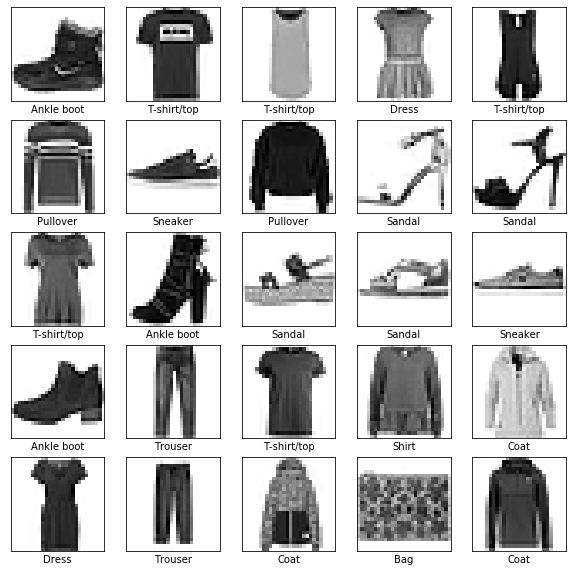

In [11]:
# visualization
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,1+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

### Create a model

In [12]:
model  = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
filepath = './saved-model-{epoch:02d}-{val_loss: .2f}.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss',verbose=1,
                                             save_best_only=False, mode='max')

In [20]:
model.fit(train_images, train_labels, validation_split=0.2,
          epochs=5, shuffle=True, callbacks=[checkpoint])

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 121us/step - loss: 0.2547 - acc: 0.9055 - val_loss: 0.3284 - val_acc: 0.8867

Epoch 00001: saving model to ./saved-model-01- 0.33.hdf5
Epoch 2/5
48000/48000 [==============================] - 6s 121us/step - loss: 0.2448 - acc: 0.9082 - val_loss: 0.3468 - val_acc: 0.8790

Epoch 00002: saving model to ./saved-model-02- 0.35.hdf5
Epoch 3/5
48000/48000 [==============================] - 6s 121us/step - loss: 0.2355 - acc: 0.9127 - val_loss: 0.3154 - val_acc: 0.8912

Epoch 00003: saving model to ./saved-model-03- 0.32.hdf5
Epoch 4/5
48000/48000 [==============================] - 6s 117us/step - loss: 0.2284 - acc: 0.9145 - val_loss: 0.3266 - val_acc: 0.8901

Epoch 00004: saving model to ./saved-model-04- 0.33.hdf5
Epoch 5/5
48000/48000 [==============================] - 6s 118us/step - loss: 0.2213 - acc: 0.9170 - val_loss: 0.3186 - val_acc: 0.8909

Epoch 00005: saving model to ./s

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('\테스트 정확도:', test_acc)

10000/10000 [==============================] - 0s 28us/step
\테스트 정확도: 0.8846


### Make prediction

In [0]:
predictions = model.predict(test_images)

In [23]:
print(predictions[0])

[7.1521538e-07 1.3072925e-11 6.4371960e-08 1.5058077e-10 6.2210251e-11
 1.3039209e-03 2.2917250e-06 4.4798893e-03 1.2001209e-07 9.9421304e-01]


In [24]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]), color=color)
    

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=  plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


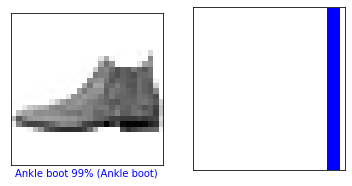

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()


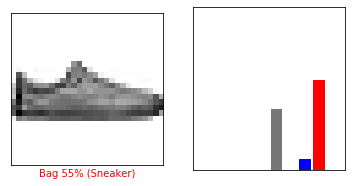

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

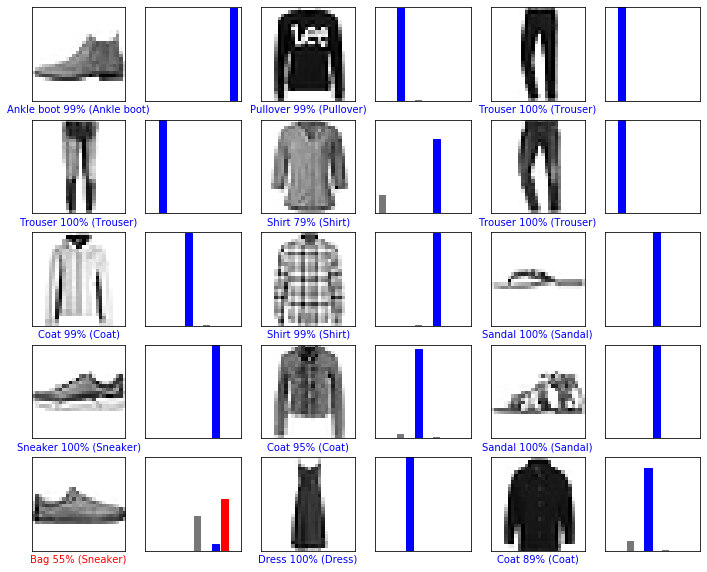

In [41]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()